In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)


from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    TimeSeriesSplit,
    KFold, 
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold
)

from sklearn.impute import SimpleImputer

IMPORTING Student, GrdSystem, S_H_Survey to generate synthetic data

In [2]:
from stdInfo import Student

student = Student(600)
student_info = student.std_info_dt()
print(student_info)

                Name  Year Student Number
0     Michael Thomas     1       24427517
1    Michael Mcguire     4       21908695
2     Jonathan Smith     4       21620116
3       Jaime Phelps     2       23128726
4    Nicole Hamilton     3       22926109
..               ...   ...            ...
595       Jason Gray     4       21811928
596      Terry Baker     4       21143984
597     Taylor Glenn     3       22690757
598    Steve Bennett     3       22951969
599      Heidi Boone     2       23817287

[600 rows x 3 columns]


In [3]:
from stdGrade import GrdSystem

students = GrdSystem(600)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                Name  Year Student Number  Subject_1  Subject_2  Subject_3  \
0     Michael Thomas     1       24427517       1.50       1.50       2.75   
1    Michael Mcguire     4       21908695       5.00       1.00       2.25   
2     Jonathan Smith     4       21620116       2.75       1.00       1.00   
3       Jaime Phelps     2       23128726       5.00       1.25       1.00   
4    Nicole Hamilton     3       22926109       1.50       2.50       1.75   
..               ...   ...            ...        ...        ...        ...   
595       Jason Gray     4       21811928       1.75       1.75       2.25   
596      Terry Baker     4       21143984       2.75       5.00       2.75   
597     Taylor Glenn     3       22690757       1.50       5.00       2.25   
598    Steve Bennett     3       22951969       1.75       2.25       1.25   
599      Heidi Boone     2       23817287       2.00       2.50       2.50   

     Subject_4  Subject_5     Status  Subject_6  Subject_7  Sub

In [4]:
from StudyHbtsSurvey import S_H_Survey

survey = S_H_Survey(600, Total_respondents= 600, Respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                Name  Year Student Number Homework_Question_1  \
0     Michael Thomas     1       24427517               Agree   
1    Michael Mcguire     4       21908695               Agree   
2     Jonathan Smith     4       21620116   Strongly Disagree   
3       Jaime Phelps     2       23128726   Strongly Disagree   
4    Nicole Hamilton     3       22926109            Disagree   
..               ...   ...            ...                 ...   
595       Jason Gray     4       21811928                 NaN   
596      Terry Baker     4       21143984                 NaN   
597     Taylor Glenn     3       22690757                 NaN   
598    Steve Bennett     3       22951969                 NaN   
599      Heidi Boone     2       23817287                 NaN   

    Homework_Question_2 Homework_Question_3 Time Allocation_Question_1  \
0                 Agree   Strongly Disagree          Strongly Disagree   
1                 Agree               Agree             Strongly Agree 

Merging dataframes of student_grades and student_survey, as well as understading the data

In [5]:
merged_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
merged_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3
0,Michael Thomas,1,24427517,1.50,1.50,2.75,5.00,2.75,Irregular,NaN,NaN,NaN,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree
1,Michael Mcguire,4,21908695,5.00,1.00,2.25,3.00,5.00,Irregular,NaN,NaN,NaN,3.25,2,Agree,Agree,Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree
2,Jonathan Smith,4,21620116,2.75,1.00,1.00,3.00,4.00,Irregular,NaN,NaN,NaN,2.35,1,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree
3,Jaime Phelps,2,23128726,5.00,1.25,1.00,1.50,2.25,Irregular,3.00,2.75,1.25,2.13,1,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree
4,Nicole Hamilton,3,22926109,1.50,2.50,1.75,1.75,1.50,Regular,1.50,1.25,NaN,1.68,0,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Jason Gray,4,21811928,1.75,1.75,2.25,1.25,2.25,Regular,NaN,NaN,NaN,1.85,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
596,Terry Baker,4,21143984,2.75,5.00,2.75,1.25,1.75,Irregular,NaN,NaN,NaN,2.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
597,Taylor Glenn,3,22690757,1.50,5.00,2.25,1.00,3.00,Irregular,2.75,2.50,NaN,2.57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
598,Steve Bennett,3,22951969,1.75,2.25,1.25,2.00,2.25,Irregular,4.00,3.00,NaN,2.36,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [6]:
merged_data.to_csv('tbl_10_try.csv', index=False)
print('Done')

Done


In [7]:
merged_data.shape

(600, 32)

In [8]:
merged_data.dtypes

Name                                   object
Year                                    int64
Student Number                         object
Subject_1                             float64
Subject_2                             float64
Subject_3                             float64
Subject_4                             float64
Subject_5                             float64
Status                                 object
Subject_6                             float64
Subject_7                             float64
Subject_8                             float64
Final Grade                           float64
Subjects Failed                         int64
Homework_Question_1                    object
Homework_Question_2                    object
Homework_Question_3                    object
Time Allocation_Question_1             object
Time Allocation_Question_2             object
Time Allocation_Question_3             object
Reading and Note Taking_Question_1     object
Reading and Note Taking_Question_2

In [9]:
merged_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,296.000000,296.000000,135.000000,600.000000,600.000000
mean,2.596667,2.555000,2.49250,2.472500,2.433750,2.451250,2.504223,2.492399,2.390741,2.483283,1.148333
std,1.120751,1.194247,1.12545,1.160203,1.117141,1.148972,1.168161,1.199993,1.107811,0.476055,0.959791
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,0.000000
25%,2.000000,1.750000,1.50000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,2.150000,0.000000
50%,3.000000,2.250000,2.25000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.460000,1.000000
75%,4.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.790000,2.000000
max,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.360000,4.000000


In [10]:
merged_data.columns

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3'],
      dtype='object')

Picking the features needed for prediction model

In [11]:
merged_data = merged_data[[ #'Name', 
        'Year', 
        #'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       #'Subject_4', 'Subject_5', 
       #'Subject_6', 'Subject_7','Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time Allocation_Question_1', 'Time Allocation_Question_2',
       'Time Allocation_Question_3', 'Reading and Note Taking_Question_1',
       'Reading and Note Taking_Question_2',
       'Reading and Note Taking_Question_3',
       'Study Period Procedures_Question_1',
       'Study Period Procedures_Question_2',
       'Study Period Procedures_Question_3', 'Written Works_Question_1',
       'Written Works_Question_2', 'Written Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3', 'Status']].copy()

In [12]:
merged_data.head()

,Year,Final Grade,Subjects Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time Allocation_Question_1,Time Allocation_Question_2,Time Allocation_Question_3,Reading and Note Taking_Question_1,Reading and Note Taking_Question_2,Reading and Note Taking_Question_3,Study Period Procedures_Question_1,Study Period Procedures_Question_2,Study Period Procedures_Question_3,Written Works_Question_1,Written Works_Question_2,Written Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
0,1,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Irregular
1,4,3.25,2,Agree,Agree,Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Irregular
2,4,2.35,1,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Irregular
3,2,2.13,1,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Irregular
4,3,1.68,0,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Regular


Renaming columns, making sure that there are no spaces and in proper capitalization

In [13]:
merged_data = merged_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation_Question_1" : "Time_Allocation_Question_1",
    "Time Allocation_Question_2" : "Time_Allocation_Question_2",
    "Time Allocation_Question_3" : "Time_Allocation_Question_3",
    "Reading and Note Taking_Question_1" : "Reading_and_Note_Taking_Question_1",
    "Reading and Note Taking_Question_2" : "Reading_and_Note_Taking_Question_2",
    "Reading and Note Taking_Question_3" : "Reading_and_Note_Taking_Question_3",
    "Study Period Procedures_Question_1" : "Study_Period_Procedures_Question_1",
    "Study Period Procedures_Question_2" : "Study_Period_Procedures_Question_2",
    "Study Period Procedures_Question_3" : "Study_Period_Procedures_Question_3",
    "Written Works_Question_1" : "Written_Works_Question_1",
    "Written Works_Question_2" : "Written_Works_Question_2",
    "Written Works_Question_3" : "Written_Works_Question_3"
})

In [14]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
0,1,2.79,1,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Agree,Irregular
1,4,3.25,2,Agree,Agree,Agree,Strongly Agree,Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Disagree,Strongly Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Disagree,Irregular
2,4,2.35,1,Strongly Disagree,Disagree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Disagree,Disagree,Agree,Agree,Strongly Disagree,Strongly Agree,Disagree,Strongly Agree,Irregular
3,2,2.13,1,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Irregular
4,3,1.68,0,Disagree,Agree,Strongly Disagree,Agree,Disagree,Disagree,Strongly Disagree,Disagree,Strongly Agree,Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Agree,Strongly Agree,Regular


Some data are in object, we need to convert it to numerical for better understading 

In [15]:
# Converting Ordinal data to Numerical Data

survey_Columns = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3']

for columns in survey_Columns:
    merged_data[columns] = merged_data[columns].map({
        'Strongly Disagree' : 1, 
        'Disagree' : 2, 
        'Agree': 3, 
        'Strongly Agree' : 4
    })

In [16]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
0,1,2.79,1,3.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,3.0,1.0,3.0,Irregular
1,4,3.25,2,3.0,3.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,Irregular
2,4,2.35,1,1.0,2.0,4.0,2.0,3.0,4.0,4.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,Irregular
3,2,2.13,1,1.0,1.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,Irregular
4,3,1.68,0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,1.0,4.0,1.0,2.0,3.0,4.0,Regular


In [17]:
# Converting Ordinal data to Numerical Data

status_map = {
    "Regular": 1, 
    "Irregular": 0
}

merged_data['Status'] = merged_data['Status'].map(status_map)

In [18]:
merged_data.head()

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
0,1,2.79,1,3.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0,3.0,1.0,3.0,0
1,4,3.25,2,3.0,3.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,4.0,1.0,2.0,1.0,0
2,4,2.35,1,1.0,2.0,4.0,2.0,3.0,4.0,4.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,0
3,2,2.13,1,1.0,1.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,0
4,3,1.68,0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,3.0,4.0,1.0,1.0,4.0,1.0,2.0,3.0,4.0,1


Handling missing values by imputing

In [19]:
# Missing Values
merged_data.isnull().sum()

Year                                   0
Final_Grade                            0
Subjects_Failed                        0
Homework_Question_1                   69
Homework_Question_2                   69
Homework_Question_3                   69
Time_Allocation_Question_1            69
Time_Allocation_Question_2            69
Time_Allocation_Question_3            69
Reading_and_Note_Taking_Question_1    69
Reading_and_Note_Taking_Question_2    69
Reading_and_Note_Taking_Question_3    69
Study_Period_Procedures_Question_1    69
Study_Period_Procedures_Question_2    69
Study_Period_Procedures_Question_3    69
Written_Works_Question_1              69
Written_Works_Question_2              69
Written_Works_Question_3              69
Examination_Question_1                69
Examination_Question_2                69
Examination_Question_3                69
Status                                 0
dtype: int64

In [20]:
# FILLING IN THE NAN VALUES 

col_to_impute = ['Homework_Question_1',
       'Homework_Question_2', 'Homework_Question_3',
       'Time_Allocation_Question_1', 'Time_Allocation_Question_2',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1',
       'Study_Period_Procedures_Question_2',
       'Study_Period_Procedures_Question_3', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3',
       'Examination_Question_1', 'Examination_Question_2',
       'Examination_Question_3']

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(merged_data[col_to_impute])
merged_data[col_to_impute] = imputer.transform(merged_data[col_to_impute])

In [21]:
merged_data.isnull().sum()

Year                                  0
Final_Grade                           0
Subjects_Failed                       0
Homework_Question_1                   0
Homework_Question_2                   0
Homework_Question_3                   0
Time_Allocation_Question_1            0
Time_Allocation_Question_2            0
Time_Allocation_Question_3            0
Reading_and_Note_Taking_Question_1    0
Reading_and_Note_Taking_Question_2    0
Reading_and_Note_Taking_Question_3    0
Study_Period_Procedures_Question_1    0
Study_Period_Procedures_Question_2    0
Study_Period_Procedures_Question_3    0
Written_Works_Question_1              0
Written_Works_Question_2              0
Written_Works_Question_3              0
Examination_Question_1                0
Examination_Question_2                0
Examination_Question_3                0
Status                                0
dtype: int64

We're trying to observe if there is a need to drop outliers, as well as if there is a imbalances in the data 

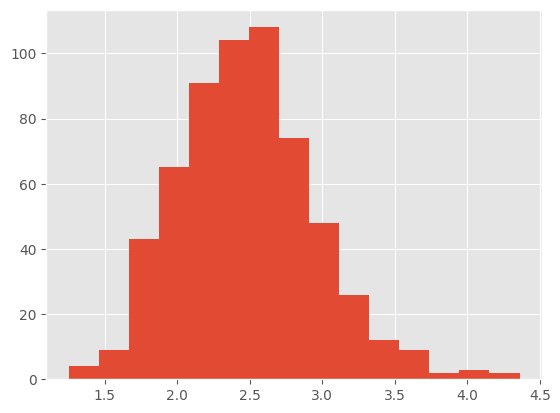

In [22]:
# Outlier 
plt.hist(merged_data['Final_Grade'], bins = 15)
plt.show()

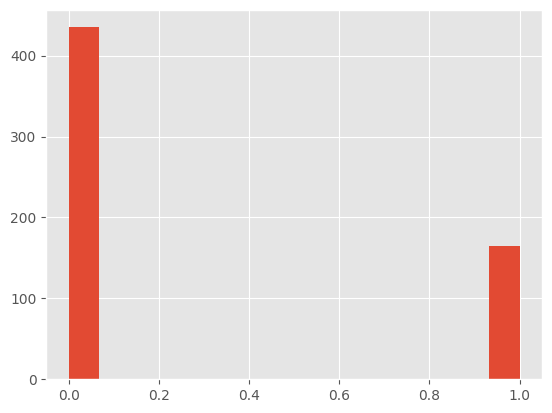

In [23]:
# This shows the data of students who are regular and irregular students 
# It shows imbalances 
plt.hist(merged_data['Status'], bins = 15)
plt.show()

In [24]:
# Quantile - identify the outlier

# Lower limit shows who are high performing students
lowerlimit = merged_data['Final_Grade'].quantile(0.05)
lowerlimit
filtered_data_lower = merged_data[merged_data['Final_Grade'] < lowerlimit]

filtered_data_lower

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
4,3,1.68,0,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,4.00000,1.000000,1.000000,4.000000,1.000000,2.000000,3.000000,4.000000,1
33,3,1.75,0,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,1.00000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,1
37,4,1.70,0,2.000000,3.000000,4.000000,1.000000,1.000000,3.000000,2.000000,3.000000,4.000000,1.000000,3.00000,4.000000,2.000000,3.000000,4.000000,1.000000,4.000000,1.000000,1
44,3,1.68,0,2.000000,4.000000,1.000000,1.000000,4.000000,1.000000,4.000000,4.000000,3.000000,2.000000,1.00000,3.000000,1.000000,4.000000,2.000000,4.000000,4.000000,1.000000,1
69,3,1.61,0,1.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,4.000000,3.000000,2.000000,1.00000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,2.000000,1
76,4,1.70,0,4.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.00000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,1
94,4,1.45,0,3.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.00000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1
108,4,1.25,0,2.000000,4.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.00000,4.000000,4.000000,4.000000,2.000000,3.000000,1.000000,3.000000,1
130,1,1.64,0,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,2.000000,3.000000,4.00000,1.000000,3.000000,4.000000,4.000000,3.000000,4.000000,2.000000,1
141,4,1.45,0,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.00000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1


In [25]:
# Upper limit shows who are low performing students 

Upperlimit = merged_data['Final_Grade'].quantile(0.95)
Upperlimit
filtered_data_upper = merged_data[merged_data['Final_Grade'] > Upperlimit]

filtered_data_upper

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Status
24,2,3.38,4,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.00000,4.000000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,0
25,4,3.45,3,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,1.000000,3.00000,1.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,0
39,1,3.98,4,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.00000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0
42,1,3.43,2,3.000000,4.000000,2.000000,3.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,2.00000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,0
55,1,3.39,3,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,4.000000,1.00000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,0
91,1,3.43,2,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.00000,3.000000,1.000000,4.000000,2.000000,2.000000,1.000000,3.000000,0
133,1,3.54,2,1.000000,1.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0
137,2,3.33,4,4.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.00000,3.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,0
160,1,4.36,4,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,4.000000,2.000000,4.000000,2.00000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0
162,1,3.57,3,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.00000,3.000000,1.000000,1.000000,4.000000,4.000000,4.000000,3.000000,0


Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [26]:
# Dependent(y) and Independent(x) Variable segregation 

x = merged_data.drop(['Status'], axis=1)
y = merged_data['Status']



In [27]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [28]:
# Applying SMOTE 

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=27)
smote_x_train, smote_y_train = smote.fit_resample(x_train, y_train)

print('Before sampling class distribution: ', Counter(y_train))
print('After sampling class distribution: ', Counter(smote_y_train))


Before sampling class distribution:  Counter({0: 326, 1: 124})
After sampling class distribution:  Counter({0: 326, 1: 326})


In [29]:
# Feature Scaling (Normalization & Standardization(it works wells for all kind data))
# Why? So that it will have the similar impact while training the model 
# make the values on the same scale 

In [30]:
#Standardization 

from sklearn.preprocessing import StandardScaler

numerical_cols = ['Final_Grade', 'Subjects_Failed']

scaler = StandardScaler()
smote_x_train[numerical_cols] = scaler.fit_transform(smote_x_train[numerical_cols])
x_test[numerical_cols] = scaler.fit_transform(x_test[numerical_cols])

In [31]:
smote_x_train

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3
0,1,0.580451,0.214160,2.493409,2.553672,2.474576,2.414313,2.468927,2.435028,2.444444,2.544256,2.536723,2.468927,2.529190,2.514124,2.548023,2.455744,2.587571,2.468927,2.549906,2.457627
1,4,0.772338,0.214160,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
2,2,0.644414,0.214160,2.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,4.000000,4.000000
3,3,-1.402376,-0.827873,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,4.000000,1.000000,1.000000,4.000000,1.000000,2.000000,3.000000,4.000000
4,1,0.388565,0.214160,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1,-0.706224,-0.827873,2.662097,2.036320,2.316549,2.276352,2.645767,2.956143,1.963464,2.030040,2.358002,2.978753,2.685964,3.008901,2.365538,1.971001,2.058931,2.645767,3.032768,2.638230
648,4,-1.941143,-0.827873,1.163100,1.169682,2.051830,2.936035,2.051213,2.047511,1.157752,2.059440,2.949404,1.160426,2.057795,3.837723,2.059851,1.158986,2.954957,2.942000,2.950844,3.831553
649,4,-0.635029,-0.827873,2.099602,2.111767,1.297665,1.285500,2.892795,2.885952,2.089718,2.109866,1.310211,3.690930,2.904960,2.901919,3.706897,2.091999,2.118610,2.094660,2.909142,2.092379
650,3,-0.892961,-0.827873,2.100649,2.671054,2.875755,2.042355,2.608596,2.320618,2.590553,2.401119,2.921558,2.871591,2.916006,2.904902,2.666890,2.598881,2.959033,2.608596,2.668278,2.074278


Interpretation

High positive correlation (close to +1): Survey questions with strong agreement are likely tied to the student’s status/final grade (e.g., good performance or passing).

High negative correlation (close to -1): Strong disagreements might be linked to poorer performance or failure.

Close to 0 correlation: This means the survey question doesn’t have a strong predictive power for the Status.

In [32]:
smote_y_train_df = smote_y_train.rename("Target")

# Concatenate the feature DataFrame (smote_x_train) with the target column (smote_y_train_df)
columnStatus_for_correlation = pd.concat([smote_x_train, smote_y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = columnStatus_for_correlation.corr()

In [33]:
correlation_matrix

,Year,Final_Grade,Subjects_Failed,Homework_Question_1,Homework_Question_2,Homework_Question_3,Time_Allocation_Question_1,Time_Allocation_Question_2,Time_Allocation_Question_3,Reading_and_Note_Taking_Question_1,Reading_and_Note_Taking_Question_2,Reading_and_Note_Taking_Question_3,Study_Period_Procedures_Question_1,Study_Period_Procedures_Question_2,Study_Period_Procedures_Question_3,Written_Works_Question_1,Written_Works_Question_2,Written_Works_Question_3,Examination_Question_1,Examination_Question_2,Examination_Question_3,Target
Year,1.000000,-0.068081,-0.062900,-0.013286,-0.008319,0.047162,-0.085788,-0.000648,0.016091,-0.058984,-0.006763,0.011092,-0.097034,-0.044040,-0.064195,0.021809,-0.017778,-0.007410,0.000627,0.041772,0.061247,0.067009
Final_Grade,-0.068081,1.000000,0.814884,0.015806,-0.012713,-0.024756,-0.089977,-0.019903,0.026525,0.023233,-0.018985,-0.016862,-0.086399,-0.072522,-0.043241,-0.022926,-0.016822,-0.021760,-0.110263,-0.023340,-0.021522,-0.683589
Subjects_Failed,-0.062900,0.814884,1.000000,0.012639,-0.040928,0.009003,-0.091107,-0.022848,0.020131,0.034064,0.018195,-0.058834,-0.049691,-0.049661,-0.081182,-0.041210,0.035401,-0.029557,-0.078823,-0.010889,-0.018913,-0.827873
Homework_Question_1,-0.013286,0.015806,0.012639,1.000000,0.077419,-0.063767,-0.013729,0.011427,-0.015704,0.042490,0.033822,0.059819,-0.009247,-0.055474,0.007885,-0.006330,0.006752,0.021210,0.057438,-0.003050,-0.006120,0.006425
Homework_Question_2,-0.008319,-0.012713,-0.040928,0.077419,1.000000,-0.052216,-0.010179,0.046619,-0.123852,0.052626,0.010350,0.162797,0.065652,-0.026165,-0.032476,-0.032915,-0.043200,0.005646,0.091944,-0.006233,-0.079408,0.050522
Homework_Question_3,0.047162,-0.024756,0.009003,-0.063767,-0.052216,1.000000,0.034990,0.047701,0.021631,0.072957,-0.050978,0.025226,-0.037072,0.003769,0.095568,0.034789,-0.031527,0.087099,0.023878,-0.051393,0.023622,-0.012330
Time_Allocation_Question_1,-0.085788,-0.089977,-0.091107,-0.013729,-0.010179,0.034990,1.000000,-0.000572,-0.110893,0.023645,0.066864,-0.017360,0.084477,-0.036358,0.009325,0.054213,0.108211,-0.011700,0.001475,-0.056244,0.019272,0.079288
Time_Allocation_Question_2,-0.000648,-0.019903,-0.022848,0.011427,0.046619,0.047701,-0.000572,1.000000,0.009292,0.074214,-0.015350,-0.066534,-0.090176,-0.038208,-0.126624,0.034351,0.058882,0.033962,0.041791,-0.043309,0.021755,0.010944
Time_Allocation_Question_3,0.016091,0.026525,0.020131,-0.015704,-0.123852,0.021631,-0.110893,0.009292,1.000000,-0.022611,0.027274,-0.026259,0.075819,-0.024588,-0.011380,0.047500,0.000961,-0.021830,0.032939,0.058169,0.054218,-0.035026
Reading_and_Note_Taking_Question_1,-0.058984,0.023233,0.034064,0.042490,0.052626,0.072957,0.023645,0.074214,-0.022611,1.000000,-0.064277,-0.009728,-0.050669,0.013182,0.000949,-0.007024,0.057484,-0.061243,0.028963,-0.041185,-0.027168,-0.021931


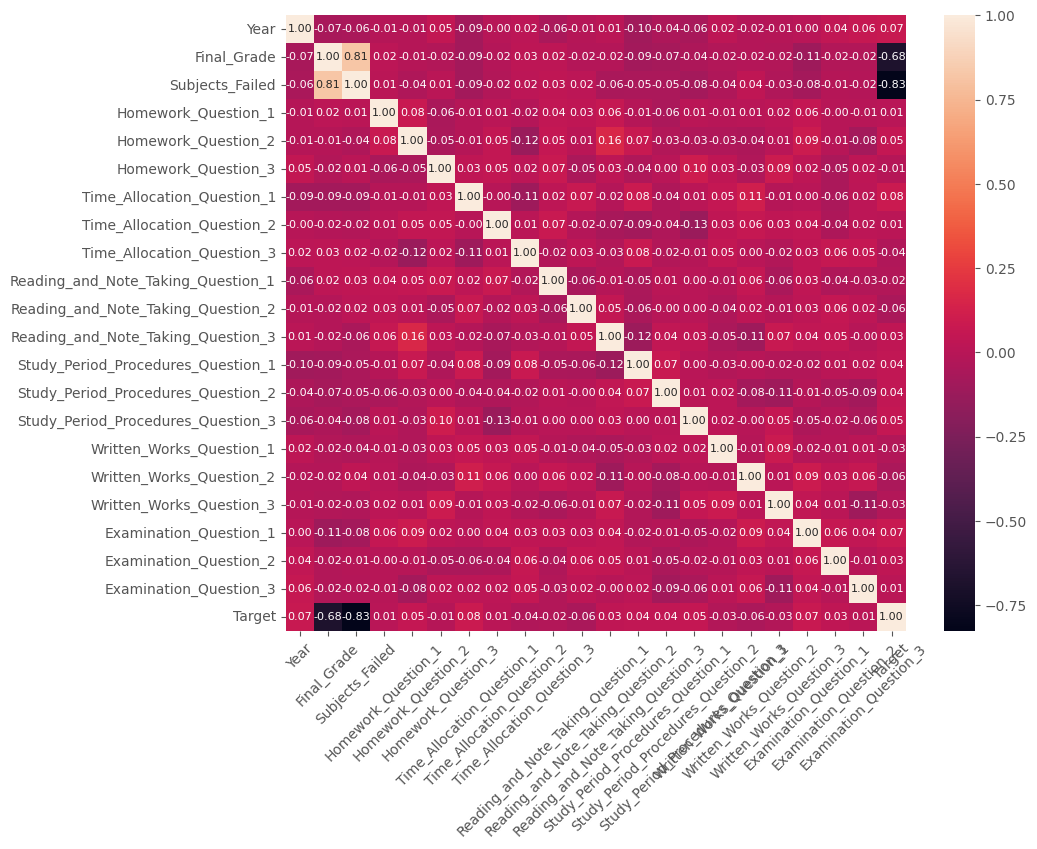

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 8})
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Rotate y-axis labels
plt.show()

In [35]:
# Feature Selection 

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [36]:
sel_l1 = SelectFromModel(LogisticRegression(penalty='l1', C=0.1, solver='liblinear'))

sel_l1.fit(smote_x_train, smote_y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [37]:
sel_l1.get_feature_names_out()

array(['Subjects_Failed', 'Homework_Question_3',
       'Time_Allocation_Question_3', 'Reading_and_Note_Taking_Question_1',
       'Reading_and_Note_Taking_Question_2',
       'Reading_and_Note_Taking_Question_3',
       'Study_Period_Procedures_Question_1', 'Written_Works_Question_1',
       'Written_Works_Question_2', 'Written_Works_Question_3'],
      dtype=object)

In [38]:
print(len(sel_l1.get_feature_names_out()))

10


In [39]:
x_train_1 = sel_l1.transform(smote_x_train)
x_test_1 = sel_l1.transform(x_test)

In [40]:
x_train_1.shape, x_train.shape

((652, 10), (450, 21))

In [42]:
kf = KFold()

plot_cv(KFold, x_train_1, smote_y_train)

NameError: name 'plot_cv' is not defined

In [43]:
# Convert everything to array

x_train_1 = np.asarray(x_train_1)
x_test_1 = np.asarray(x_test_1)
smote_y_train = np.asarray(smote_y_train)
y_test = np.asarray(y_test)

In [44]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score, roc_auc_score

# # Enable probability estimates by setting probability=True
# classifier = svm.SVC(kernel='linear', gamma='auto', C=0.1, probability=True)
# classifier.fit(x_train_1, smote_y_train)

# # Predict class labels
# y_predict = classifier.predict(x_test_1)

# # Predict probabilities for the positive class
# y_pred_prob = classifier.predict_proba(x_test_1)[:, 1]

# # Calculate accuracy and AUC-ROC scores
# acc_score = accuracy_score(y_test, y_predict)
# auc_score = roc_auc_score(y_test, y_pred_prob)

# print(f"Accuracy Score: {acc_score}")
# print(f"AUC-ROC Score: {auc_score}")

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
              'degree': [2, 3, 4],  # Only relevant for 'poly'
              'gamma': ['scale', 'auto']}  # Relevant for 'rbf' and 'poly'

# SVM model
svc = SVC()

# GridSearch to find the best parameters
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=10)
grid.fit(x_train_1, smote_y_train)

# Best kernel
print(grid.best_params_)



Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=sca

In [45]:
# Final SVM model with the best parameters
final_model = SVC(C=0.1, kernel='linear', gamma='scale')

# Fit the model on the training data
final_model.fit(x_train_1, smote_y_train)

# Predict on test data
y_pred = final_model.predict(x_test_1)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[109   0]
 [  0  41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        41

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the SVM classifier with probability=True to enable predict_proba
classifier = svm.SVC(kernel='linear', gamma='auto', C=0.1, probability=True)

# Initialize KFold
kf = KFold(n_splits=5)  # 5-fold cross-validation
accuracy_scores = []
auc_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(x_train_1):
    # Split the data into train and test sets
    x_train_fold, x_test_fold = x_train_1[train_index], x_train_1[test_index]
    y_train_fold, y_test_fold = smote_y_train[train_index], smote_y_train[test_index]
    
    # Fit the classifier
    classifier.fit(x_train_fold, y_train_fold)
    
    # Make predictions
    y_pred = classifier.predict(x_test_fold)
    y_pred_prob = classifier.predict_proba(x_test_fold)[:, 1]
    
    # Calculate accuracy and AUC-ROC
    acc = accuracy_score(y_test_fold, y_pred)
    auc = roc_auc_score(y_test_fold, y_pred_prob)
    
    accuracy_scores.append(acc)
    auc_scores.append(auc)

# Plot the results
plt.figure(figsize=(10,5))

# Plot Accuracy scores
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), accuracy_scores, marker='o', label='Accuracy')
plt.title("Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend()

# Plot AUC-ROC scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), auc_scores, marker='o', color='orange', label='AUC-ROC')
plt.title("AUC-ROC per Fold")
plt.xlabel("Fold")
plt.ylabel("AUC-ROC")
plt.ylim([0, 1])
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
